In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('SNR_initial.csv')

In [3]:
a = np.arange(0,3.1, 0.1)
a

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. ])

In [4]:
Temp = []
Beta = []
for r in a: #for loop
    T = [-96/(np.log((df.f60/df.f100)*0.6**(r+3)))]
    Temp.append(T)
    Beta.append(r)
len(Temp), len(Beta)

(31, 31)

In [5]:
Tav = [np.mean(Temp[i]) for i in range(31)]
yerr = np.std(Tav)/np.sqrt(len(Tav))
np.mean(Tav),np.std(Tav),len(Tav), yerr

(27.772327299369536, 3.7046727421718875, 31, 0.6653788667681423)

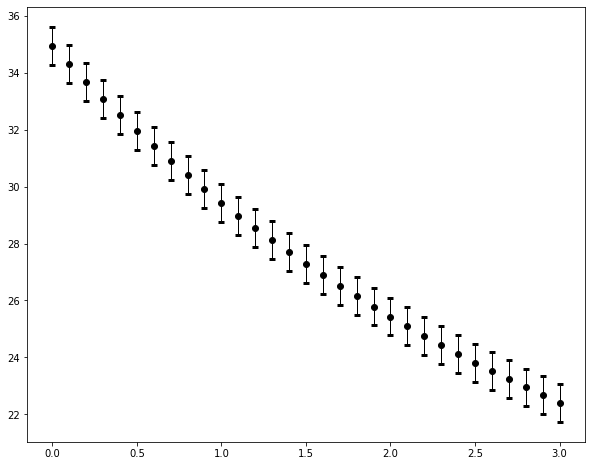

In [6]:
plt.figure(figsize = [10,8])
(_, caps, _) = plt.errorbar(Beta,Tav, yerr,fmt='ok', capsize=3, elinewidth=1)

for cap in caps:
    cap.set_color('k')
    cap.set_markeredgewidth(3)


-166511.14161913973


poly1d([ 0.6122001 , -5.94917967, 34.8288865 ])

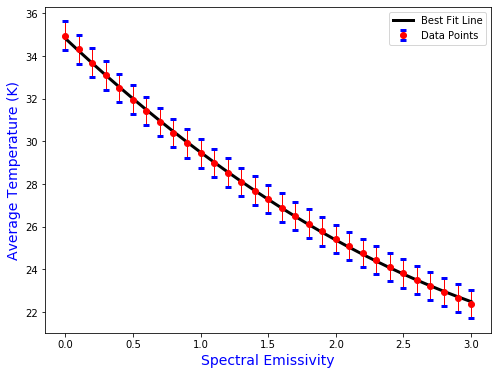

In [7]:

plt.figure(figsize = [8,6])
mymodel = np.poly1d(np.polyfit(Beta, Tav,2))
myline = np.linspace(0, 3,31)
(_, caps, _) = plt.errorbar(Beta,Tav, yerr,fmt='or', capsize=3, elinewidth=1, label = 'Data Points')

for cap in caps:
    cap.set_color('b')
    cap.set_markeredgewidth(3)
plt.plot(myline, mymodel(myline), color = 'k', lw = 3, label = 'Best Fit Line')
plt.xlabel('Spectral Emissivity', fontsize = 14, color = 'b')
plt.ylabel('Average Temperature (K)', fontsize = 14, color = 'b')

#plt.axvline(x = 2, color = 'b', lw = 1)
#plt.axhline(y = 25.43,color = 'b', lw = 1)
plt.legend()
#speed = mymodel(10)
print(r2_score(Beta, mymodel(Tav)))
#speed
plt.savefig('Figure/1Inverse.png', dpi = 400)
mymodel

-166511.14161913973


poly1d([ 0.6122001 , -5.94917967, 34.8288865 ])

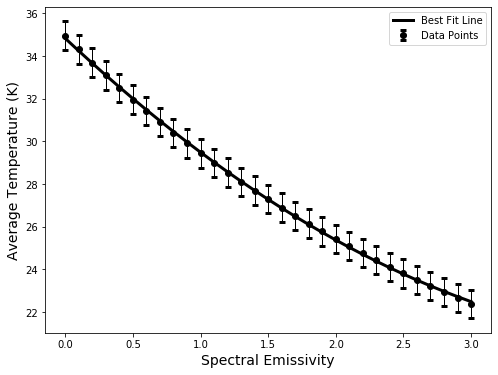

In [9]:
plt.figure(figsize = [8,6])
mymodel = np.poly1d(np.polyfit(Beta, Tav,2))
myline = np.linspace(0, 3,31)
(_, caps, _) = plt.errorbar(Beta,Tav, yerr,fmt='ok', capsize=3, elinewidth=1, label = 'Data Points')

for cap in caps:
    cap.set_color('k')
    cap.set_markeredgewidth(3)
plt.plot(myline, mymodel(myline), color = 'k', lw = 3, label = 'Best Fit Line')
plt.xlabel('Spectral Emissivity', fontsize = 14, color = 'k')
plt.ylabel('Average Temperature (K)', fontsize = 14, color = 'k')

#plt.axvline(x = 2, color = 'b', lw = 1)
#plt.axhline(y = 25.43,color = 'b', lw = 1)
plt.legend()
#speed = mymodel(10)
print(r2_score(Beta, mymodel(Tav)))
#speed
plt.savefig('Figure/2Inverse.png', dpi = 400)
mymodel